<a href="https://colab.research.google.com/github/dellaanima/AIFFEL_QUEST/blob/master/QUEST02/QUEST02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

sns.set_style('whitegrid')
sns.set(font_scale = 1.2)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Aiffel/Data/Quest02/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Aiffel/Data/Quest02/test.csv')

## Data Check

각 변수들이 나타내는 의미

ID : 집을 구분하는 번호

date : 집을 구매한 날짜

price : 타겟 변수인 집의 가격

bedrooms : 침실의 수

bathrooms : 침실당 화장실 개수

sqft_living : 주거 공간의 평방 피트

sqft_lot : 부지의 평방 피트

floors : 집의 층 수

waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)

view : 집이 얼마나 좋아 보이는지의 정도

condition : 집의 전반적인 상태

grade : King County grading 시스템 기준으로 매긴 집의 등급

sqft_above : 지하실을 제외한 평방 피트

sqft_basement : 지하실의 평방 피트

yr_built : 집을 지은 년도

yr_renovated : 집을 재건축한 년도

zipcode : 우편번호

lat : 위도

long : 경도

sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

In [4]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [6]:
df_train.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# 결측치 확인
for col in df_train.columns:
    Null = "Feature: {:<10}\t Count of Null: {}".format(col, df_train[col].isnull().sum())
    print(Null)

Feature: id        	 Count of Null: 0
Feature: date      	 Count of Null: 0
Feature: price     	 Count of Null: 0
Feature: bedrooms  	 Count of Null: 0
Feature: bathrooms 	 Count of Null: 0
Feature: sqft_living	 Count of Null: 0
Feature: sqft_lot  	 Count of Null: 0
Feature: floors    	 Count of Null: 0
Feature: waterfront	 Count of Null: 0
Feature: view      	 Count of Null: 0
Feature: condition 	 Count of Null: 0
Feature: grade     	 Count of Null: 0
Feature: sqft_above	 Count of Null: 0
Feature: sqft_basement	 Count of Null: 0
Feature: yr_built  	 Count of Null: 0
Feature: yr_renovated	 Count of Null: 0
Feature: zipcode   	 Count of Null: 0
Feature: lat       	 Count of Null: 0
Feature: long      	 Count of Null: 0
Feature: sqft_living15	 Count of Null: 0
Feature: sqft_lot15	 Count of Null: 0


<Axes: >

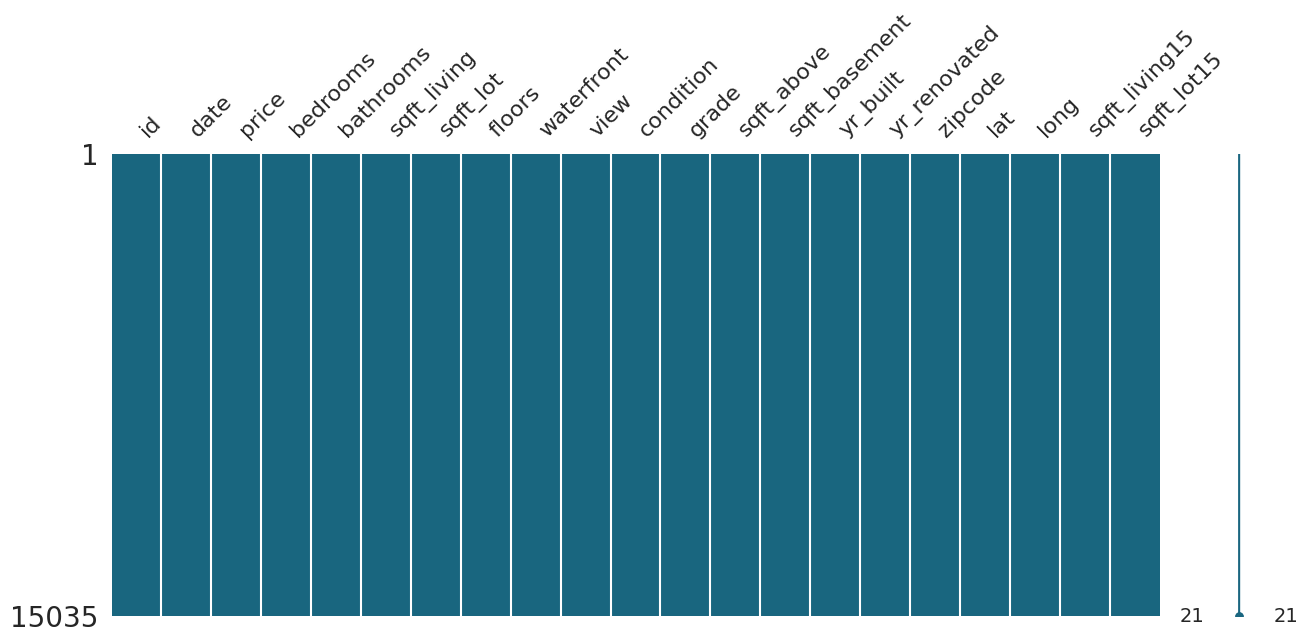

In [8]:
# missingno의 matrix로 시각화한 모습, 역시 결측치 없음.
msno.matrix(df = df_train.iloc[:,:], color = (0.1, 0.4, 0.5), figsize = (15, 6))


## Skew / Kurt 탐색 및 Log 변환

In [9]:
#각 feature들의 skewness (분포의 비대칭성) Kurtosis (어느 정도 더(또는 덜) 뾰족한 지)
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Numerical Features: ", len(numerical_feats))

for col in numerical_feats.difference(["date"]):
    SkewKurt = "{:<10}\t Skewness: {:.4f}\t Kurtosis: {:.4f}".format(col, df_train[col].skew(), df_train[col].kurt())
    print(SkewKurt)

# Based on the Output:
# target feature인 price 역시 조정이 필요.

Numerical Features:  20
bathrooms 	 Skewness: 0.5136	 Kurtosis: 1.3422
bedrooms  	 Skewness: 0.5186	 Kurtosis: 1.6626
condition 	 Skewness: 1.0441	 Kurtosis: 0.5561
floors    	 Skewness: 0.5894	 Kurtosis: -0.5306
grade     	 Skewness: 0.7517	 Kurtosis: 1.1828
id        	 Skewness: 0.0000	 Kurtosis: -1.2000
lat       	 Skewness: -0.4880	 Kurtosis: -0.6720
long      	 Skewness: 0.9180	 Kurtosis: 1.2382
price     	 Skewness: 4.2903	 Kurtosis: 40.1549
sqft_above	 Skewness: 1.4291	 Kurtosis: 3.3803
sqft_basement	 Skewness: 1.5566	 Kurtosis: 2.3539
sqft_living	 Skewness: 1.4925	 Kurtosis: 5.7312
sqft_living15	 Skewness: 1.1259	 Kurtosis: 1.6931
sqft_lot  	 Skewness: 13.3505	 Kurtosis: 297.9409
sqft_lot15	 Skewness: 10.0284	 Kurtosis: 174.1054
view      	 Skewness: 3.3788	 Kurtosis: 10.7632
waterfront	 Skewness: 11.7281	 Kurtosis: 135.5667
yr_built  	 Skewness: -0.4696	 Kurtosis: -0.6661
yr_renovated	 Skewness: 4.5694	 Kurtosis: 18.8831
zipcode   	 Skewness: 0.4059	 Kurtosis: -0.8480


In [10]:
# Price 칼럼 Log 변환
df_train["price"] = df_train["price"].map(lambda i:np.log(i) if i>0 else 0)

# EDA

## Correlation Heatmap

<Axes: title={'center': 'Correlation of Numeric Features with Price'}>

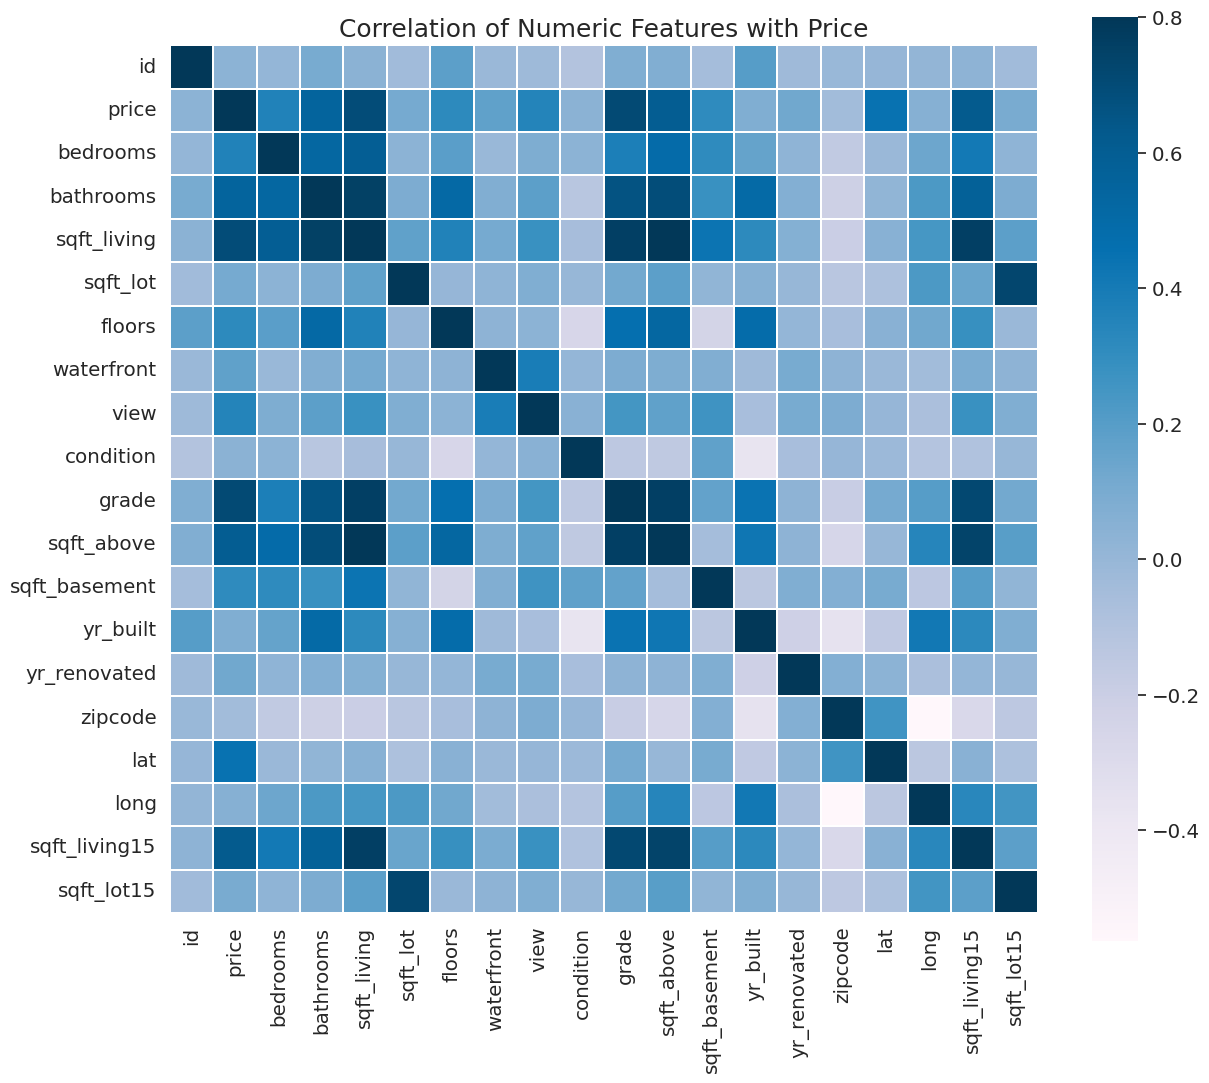

In [11]:
# 전체적인 correlation heatmap
corr_data = df_train[numerical_feats]

colormap = plt.cm.PuBu
sns.set(font_scale=1.3)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Price',size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)



Index(['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'bedrooms', 'view', 'floors', 'sqft_basement',
       'waterfront'],
      dtype='object')


<Axes: >

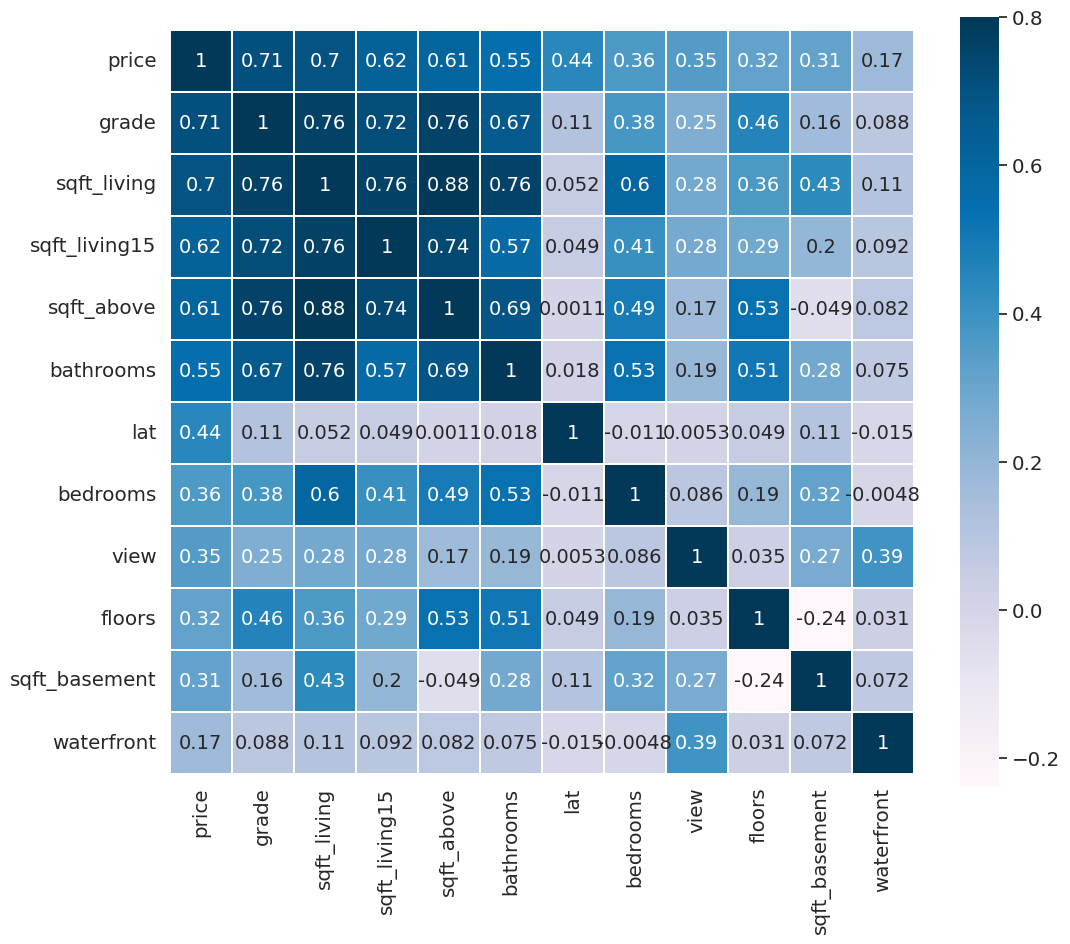

In [12]:
# 상관계수가 높은 순으로 12개를 뽑아서 다시 만든 heatmap
k= 12
cols = corr_data.corr().nlargest(k,'price')['price'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)



## Numerical Feature

<Axes: xlabel='sqft_lot15', ylabel='price'>

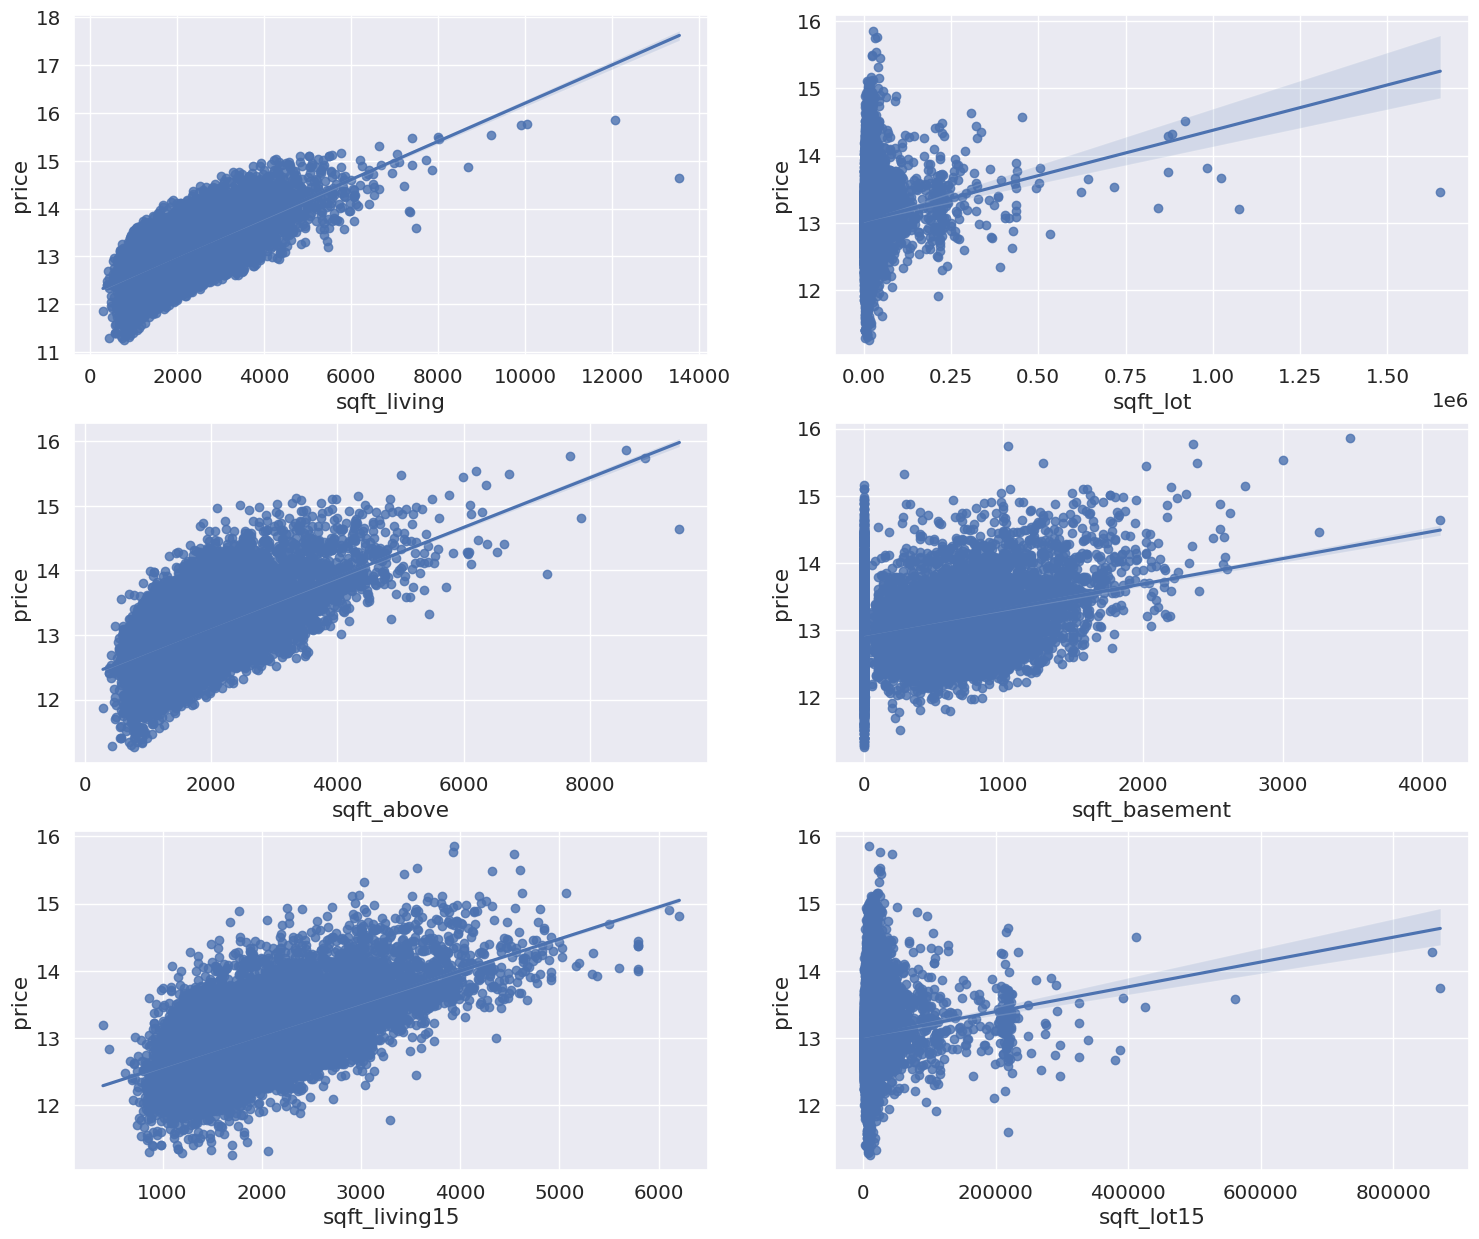

In [13]:
# 수치형 변수들에 따른 price를 scatter plo 로
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,15))

sqft_living_scatter_plot = pd.concat([df_train['price'],df_train['sqft_living']],axis = 1)
sns.regplot(x='sqft_living',y = 'price',data = sqft_living_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

sqft_lot_scatter_plot = pd.concat([df_train['price'],df_train['sqft_lot']],axis = 1)
sns.regplot(x='sqft_lot',y = 'price',data = sqft_lot_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

sqft_above_scatter_plot = pd.concat([df_train['price'],df_train['sqft_above']],axis = 1)
sns.regplot(x='sqft_above',y = 'price',data = sqft_above_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

sqft_basement_scatter_plot = pd.concat([df_train['price'],df_train['sqft_basement']],axis = 1)
sns.regplot(x='sqft_basement',y = 'price',data = sqft_basement_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

sqft_living15_scatter_plot = pd.concat([df_train['price'],df_train['sqft_living15']],axis = 1)
sns.regplot(x='sqft_living15',y = 'price',data = sqft_living15_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

sqft_lot15_scatter_plot = pd.concat([df_train['price'],df_train['sqft_lot15']],axis = 1)
sns.regplot(x='sqft_lot15',y = 'price',data = sqft_lot15_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

# Based on the Output:
# sqft_living, sqft_above, sqft_living15는 어느정도 이상치가 있어보인다.
# 나머지들은 분산이 매우 커보인다.
# basement는 0의 값이 굉장히 많다. 또한 이상치도 많아보인다.

## Numerical category Feature

In [14]:
# 등급에 따른 주택가격
df_train[["grade", "price"]].groupby(["grade"], as_index = True).describe()



price                                                        \
        count       mean       std        min        25%        50%   
grade                                                                 
1         1.0  11.863582       NaN  11.863582  11.863582  11.863582   
3         2.0  12.509322  0.046984  12.476100  12.492711  12.509322   
4        23.0  12.149332  0.476407  11.289782  11.883894  12.206073   
5       174.0  12.326819  0.460303  11.264464  12.057389  12.334736   
6      1406.0  12.538199  0.383258  11.338572  12.278393  12.523070   
7      6228.0  12.835165  0.367019  11.407565  12.560244  12.834681   
8      4207.0  13.135545  0.364454  11.849398  12.873902  13.147056   
9      1855.0  13.487337  0.371399  12.345835  13.254268  13.493927   
10      781.0  13.796002  0.387535  12.663497  13.550829  13.720089   
11      288.0  14.146649  0.405319  13.217674  13.851360  14.068601   
12       61.0  14.522919  0.416160  13.635187  14.253765  14.414347   
13        9.0  15.125002  0.493448  14.392124  14.876075  14.978661   

                             
             75%        max  
grade                        
1      11.863582  11.863582  
3      12.525934  12.542545  
4      12.454335  12.983101  
5      12.603165  13.586097  
6      12.807653  13.866204  
7      13.091904  14.533350  
8      13.369223  14.808762  
9      13.685971  14.750034  
10     14.038654  15.096444  
11     14.402596  15.770310  
12     14.817979  15.492607  
13     15.532906  15.856731

<Axes: xlabel='grade', ylabel='price'>

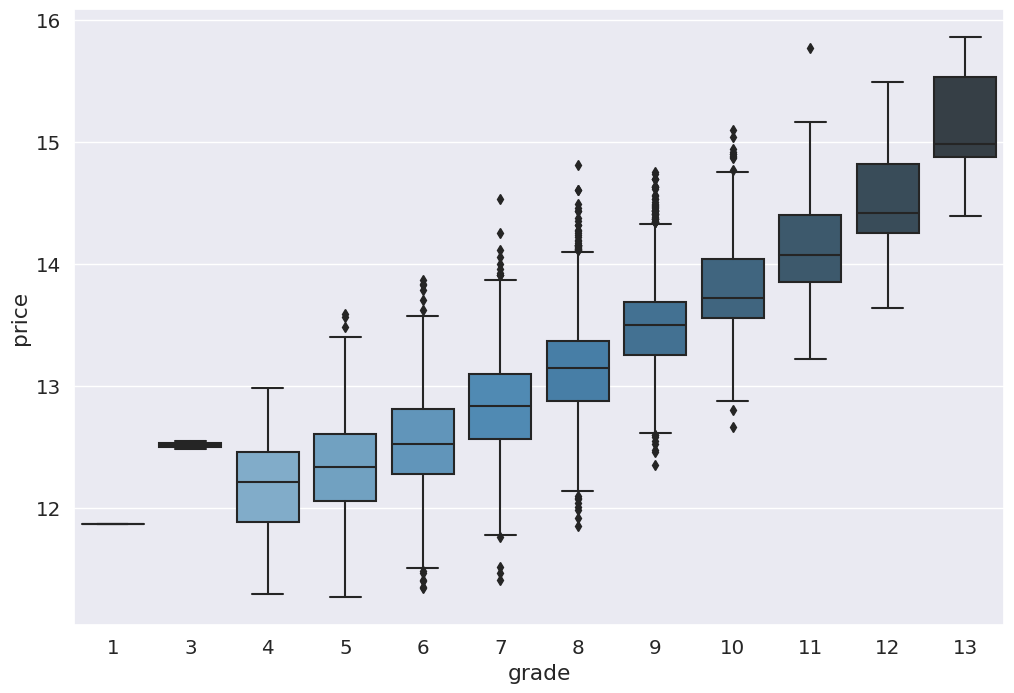

In [15]:
# grade에 따른 price의 boxplot
fig, ax = plt.subplots(figsize = (12, 8))

sns.boxplot(x = df_train["grade"], y = df_train["price"], data = df_train, ax = ax, palette = "Blues_d")

# Based on the Output:
# 1) 2등급은 존재하지 않음
# 2) 3등급의 평균값이 4등급보다 높게 나타남
# 3) 7, 8, 11등급에 상당한 이상치가 존재하는 것으로 보임
# 4) 7~10 등급의 이상치가 꽤 많은 것으로 보임
# 데이터 설명에 따르면 grade의 경우 "1-3은 건물 건축 및 디자인에 미치지 못하고 7은 평균 수준의 건축 및 디자인을, 11-13은 높은 수준의 건축 및 디자인을 지니고 있습니다."

In [16]:
# 방의 수에 따른 주택 가격
df_train[["bedrooms", "price"]].groupby(["bedrooms"], as_index = True).describe()



price                                                        \
           count       mean       std        min        25%        50%   
bedrooms                                                                 
0            4.0  12.348621  0.347430  11.863582  12.241401  12.427413   
1          133.0  12.551516  0.451841  11.289782  12.341477  12.587928   
2         1931.0  12.791904  0.462541  11.264464  12.487485  12.821258   
3         6835.0  12.937152  0.462140  11.396392  12.607697  12.932292   
4         4797.0  13.221755  0.509949  11.512925  12.834681  13.217664   
5         1108.0  13.404867  0.584359  11.798104  12.994388  13.345507   
6          188.0  13.433252  0.623261  12.345835  12.980211  13.406790   
7           22.0  13.564385  0.644318  12.542545  13.197934  13.514314   
8           10.0  13.699078  0.708304  12.736701  13.304056  13.530576   
9            5.0  13.518025  0.402768  13.017003  13.304683  13.458836   
10           2.0  13.669130  0.402205  13.384728  13.526929  13.669130   

                                
                75%        max  
bedrooms                        
0         12.534633  12.676076  
1         12.860999  13.429848  
2         13.091904  14.507657  
3         13.235692  15.096444  
4         13.554146  15.163584  
5         13.744336  15.770310  
6         13.740151  15.856731  
7         13.784190  14.875035  
8         14.164752  15.009433  
9         13.747232  14.062371  
10        13.811331  13.953532

<Axes: xlabel='bedrooms', ylabel='price'>

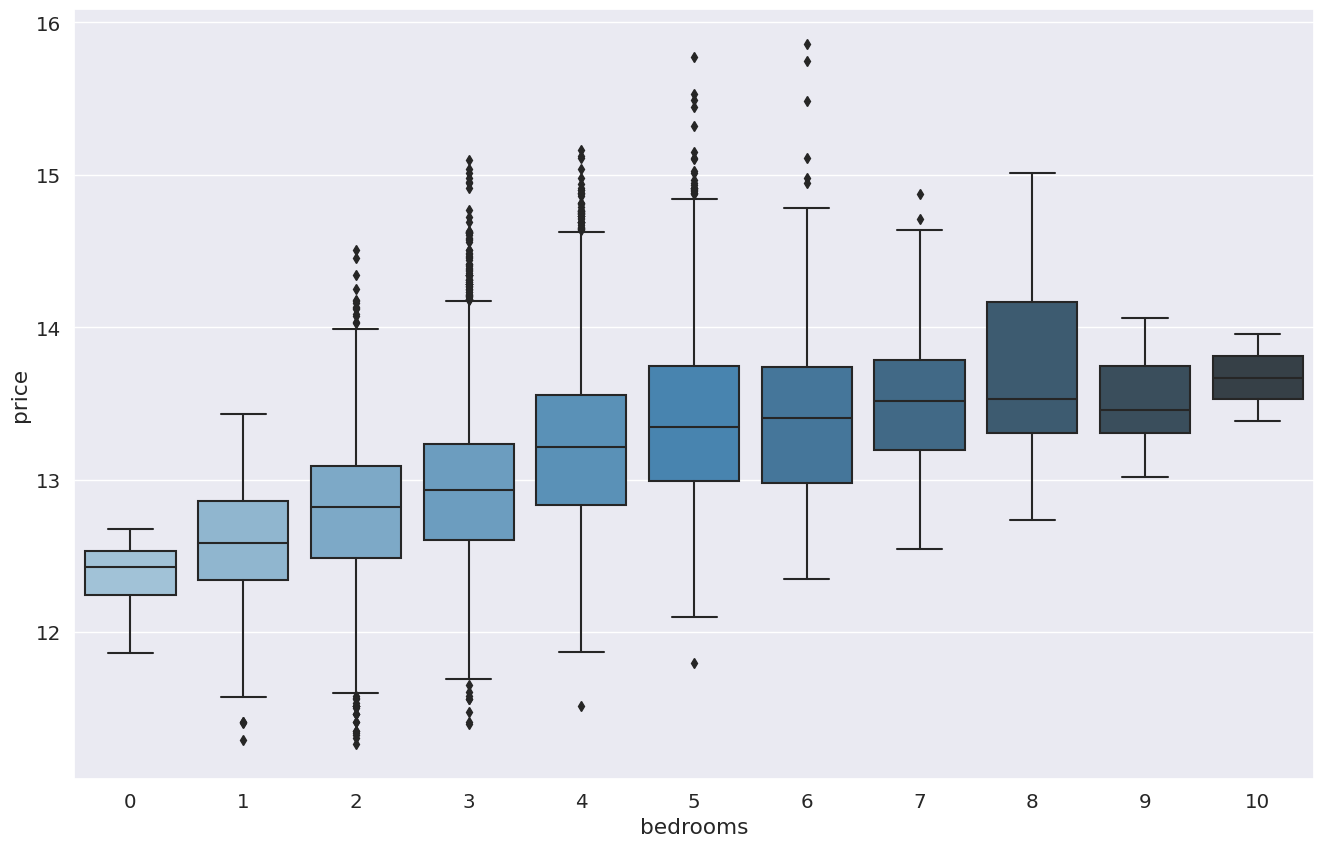

In [17]:
fig, ax = plt.subplots(figsize = (16, 10))

sns.boxplot(x = df_train["bedrooms"], y = df_train["price"], data = df_train, ax = ax, palette = "Blues_d")

# Based on the Output :
# boxplot을 살펴보면 방의 수에 따른 가격이 직관적으로 대략 선형임을 알 수 있음.
# 윗 셀의 describe를 봐도 가격의 평균값이 방에 따라 증가하는 것을 볼 수 있음.

In [18]:
# bathrooms 에 따른 주택 가격
# 데이터 의미 :
# - 0.5 : 세면대, 화장실
# - 0.75 : 세면대, 화장실, 샤워실
# - 1 : 세면대, 화장실, 샤워실, 욕조

df_train[["bathrooms", "price"]].groupby(["bathrooms"], as_index = True).describe()



price                                                        \
            count       mean       std        min        25%        50%   
bathrooms                                                                 
0.00          4.0  12.465827  0.505858  11.863582  12.241401  12.454943   
0.50          3.0  12.188450  0.511527  11.599103  12.024061  12.449019   
0.75         45.0  12.442247  0.465344  11.289782  12.154779  12.429216   
1.00       2675.0  12.662953  0.436862  11.264464  12.345835  12.676076   
1.25          5.0  13.140841  0.632244  12.524526  12.682152  13.154831   
1.50       1009.0  12.821546  0.420062  11.580584  12.498742  12.819906   
1.75       2112.0  12.937929  0.403302  11.834284  12.644328  12.948010   
2.00       1357.0  12.956771  0.416676  11.798104  12.644328  12.971540   
2.25       1433.0  13.076964  0.443696  11.982929  12.727096  13.056224   
2.50       3748.0  13.134130  0.422825  11.941475  12.807644  13.122363   
2.75        843.0  13.312885  0.426569  12.121331  13.016391  13.329378   
3.00        493.0  13.343344  0.504499  11.944708  12.977338  13.321214   
3.25        410.0  13.657036  0.530277  12.542188  13.304622  13.643532   
3.50        510.0  13.618086  0.464156  12.286038  13.304685  13.604790   
3.75        108.0  13.921494  0.478753  12.751590  13.600610  13.944341   
4.00        100.0  13.891462  0.544992  12.487485  13.542680  13.864301   
4.25         57.0  14.126142  0.461408  13.102161  13.769467  14.151983   
4.50         64.0  13.922872  0.588502  12.577636  13.602315  13.875193   
4.75         16.0  14.414985  0.507779  13.303017  14.123903  14.473581   
5.00         14.0  14.069968  0.800453  12.745486  13.437493  14.227598   
5.25         11.0  14.220566  0.768703  12.611538  14.005994  14.162640   
5.50          7.0  14.674905  0.538502  13.737549  14.433246  14.741752   
5.75          3.0  14.403476  1.168584  13.199324  13.838761  14.478199   
6.00          2.0  15.294669  0.266648  15.106120  15.200394  15.294669   
6.25          1.0  14.876075       NaN  14.876075  14.876075  14.876075   
6.75          1.0  13.592367       NaN  13.592367  13.592367  13.592367   
7.50          1.0  13.017003       NaN  13.017003  13.017003  13.017003   
7.75          1.0  15.744856       NaN  15.744856  15.744856  15.744856   
8.00          2.0  15.248208  0.860581  14.639686  14.943947  15.248208   

                                 
                 75%        max  
bathrooms                        
0.00       12.679369  13.089840  
0.50       12.483123  12.517227  
0.75       12.765688  13.573439  
1.00       12.965359  14.077875  
1.25       13.199324  14.143374  
1.50       13.091904  14.197366  
1.75       13.218289  14.557448  
2.00       13.244581  14.603968  
2.25       13.345507  14.690979  
2.50       13.422468  14.881255  
2.75       13.590365  14.594835  
3.00       13.658857  14.946913  
3.25       13.997832  15.107741  
3.50       13.919298  15.126542  
3.75       14.239464  15.110238  
4.00       14.216568  15.039286  
4.25       14.457364  15.163584  
4.50       14.271145  15.770310  
4.75       14.789061  15.110238  
5.00       14.428296  15.492607  
5.25       14.670650  15.446867  
5.50       15.029476  15.319588  
5.75       15.005552  15.532906  
6.00       15.388943  15.483217  
6.25       14.876075  14.876075  
6.75       13.592367  13.592367  
7.50       13.017003  13.017003  
7.75       15.744856  15.744856  
8.00       15.552470  15.856731

<Axes: xlabel='bathrooms', ylabel='price'>

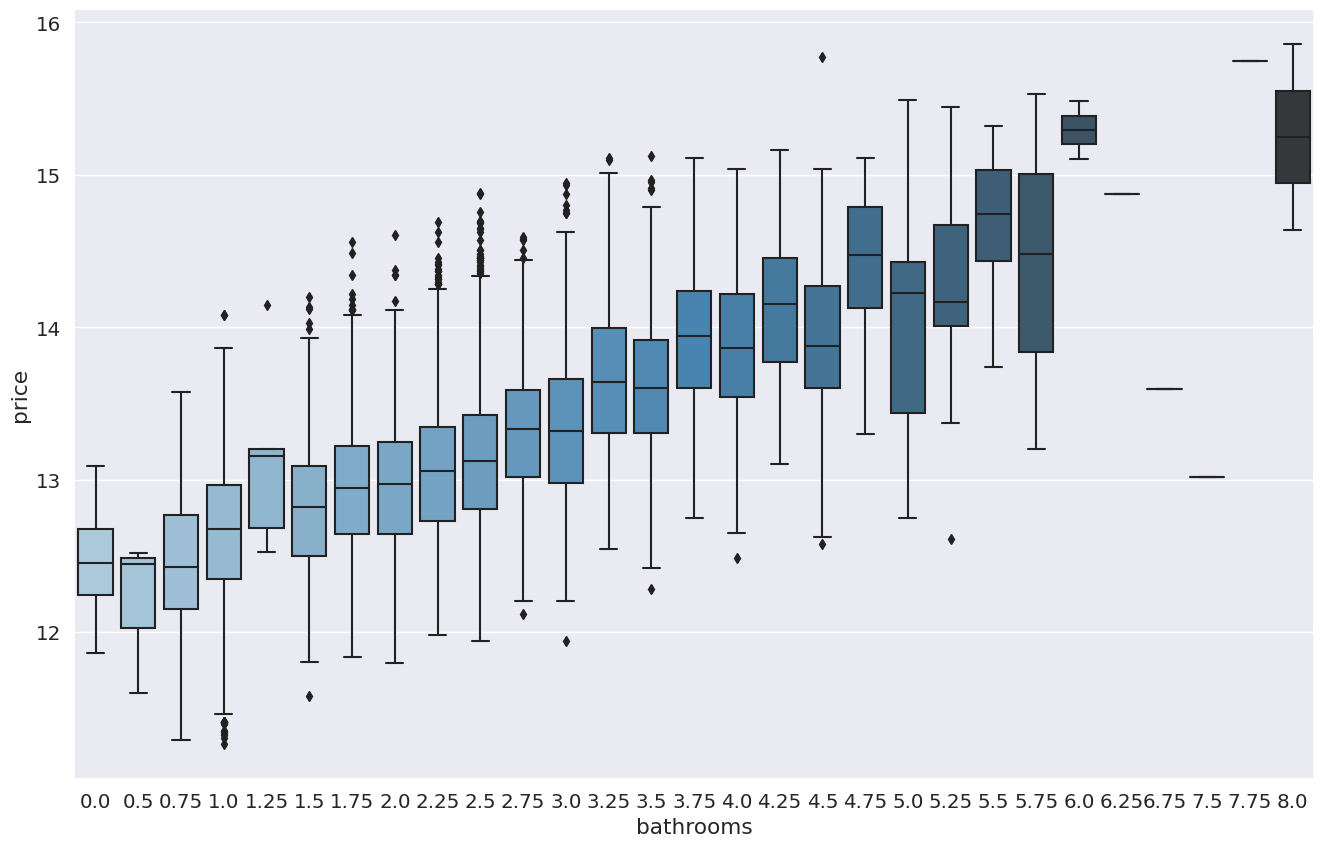

In [19]:
fig, ax = plt.subplots(figsize = (16, 10))

sns.boxplot(x = df_train["bathrooms"], y = df_train["price"], data = df_train, ax = ax, palette = "Blues_d")

In [20]:
# 층수에 따른 (floors, price는 선형관계로 보임)
df_train[["floors", "price"]].groupby(["floors"], as_index = True).describe()



price                                                        \
         count       mean       std        min        25%        50%   
floors                                                                 
1.0     7361.0  12.871365  0.478131  11.264464  12.524526  12.871335   
1.5     1330.0  13.106256  0.498624  11.719940  12.765688  13.171154   
2.0     5810.0  13.237055  0.516814  11.407565  12.846610  13.210191   
2.5      113.0  13.619963  0.613314  12.449019  13.203943  13.527828   
3.0      417.0  13.190534  0.452123  12.247215  12.860999  13.122363   
3.5        4.0  13.560786  0.968812  12.983101  13.055367  13.125305   

                              
              75%        max  
floors                        
1.0     13.171154  15.150512  
1.5     13.444447  15.110238  
2.0     13.560618  15.770310  
2.5     14.018451  15.856731  
3.0     13.369223  14.946913  
3.5     13.630723  15.009433

In [21]:
# waterfront, price는 선형관계로 보임 (Binary 있고 없고 값)
df_train[["waterfront", "price"]].groupby(["waterfront"], as_index = True).describe()


price                                                        \
              count       mean       std        min        25%        50%   
waterfront                                                                  
0           14928.0  13.040413  0.518132  11.264464  12.676076  13.017003   
1             107.0  14.123308  0.693361  12.560244  13.566967  14.232245   

                                  
                  75%        max  
waterfront                        
0           13.369223  15.856731  
1           14.610740  15.770310

In [22]:
# view, price는 선형관계로 보임
df_train[["view", "price"]].groupby(["view"], as_index = True).describe()



price                                                        \
        count       mean       std        min        25%        50%   
view                                                                  
0     13548.0  12.990406  0.487277  11.264464  12.647548  12.978493   
1       241.0  13.429804  0.516143  12.287653  13.081541  13.415033   
2       665.0  13.443661  0.538600  12.039528  13.091904  13.429848   
3       373.0  13.643124  0.555792  11.944708  13.235692  13.592367   
4       208.0  14.033443  0.608090  12.437184  13.613992  13.987359   

                            
            75%        max  
view                        
0     13.304685  15.532906  
1     13.681979  15.110238  
2     13.764217  15.770310  
3     14.076335  15.856731  
4     14.456970  15.744856

In [23]:
# condition, price는 선형관계로 보임
df_train[["condition", "price"]].groupby(["condition"], as_index = True).describe()



price                                                        \
            count       mean       std        min        25%        50%   
condition                                                                 
1            21.0  12.339777  0.647358  11.264464  11.775290  12.437184   
2           110.0  12.521061  0.544102  11.289782  12.145524  12.538967   
3          9793.0  13.054855  0.515894  11.326596  12.706696  13.017003   
4          3956.0  13.018123  0.530144  11.396392  12.628067  13.005830   
5          1155.0  13.156829  0.563010  11.608236  12.765688  13.171154   

                                 
                 75%        max  
condition                        
1          12.847927  13.396960  
2          12.876305  14.753563  
3          13.369223  15.770310  
4          13.361380  15.856731  
5          13.493927  15.110238

In [24]:
for data in [df_train, df_test]:
    data['date'] = pd.to_datetime(data['date'])
    data['date_year'] = data['date'].dt.year
    data['date_month'] = data['date'].dt.month

### Month에 따른 Price 패턴

4월에 price 최대, 그 이후 하향세

<Axes: xlabel='date_year', ylabel='date_month'>

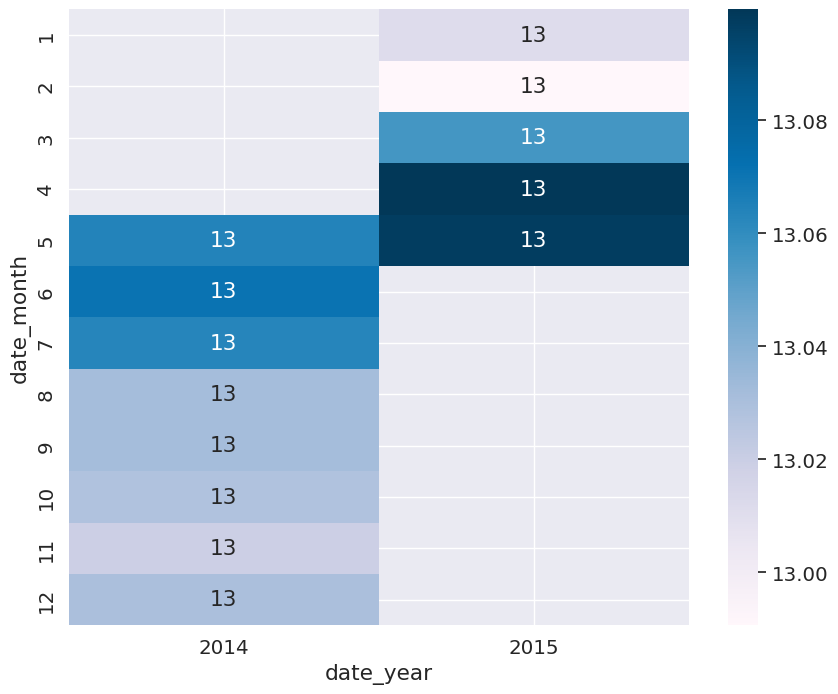

In [25]:
train_pivot = df_train.pivot_table(index=['date_month'], columns=['date_year'], values='price') # price mean
plt.figure(figsize=(10,8))
sns.heatmap(train_pivot, annot=True, cmap = colormap)

<Axes: xlabel='date_month', ylabel='price'>

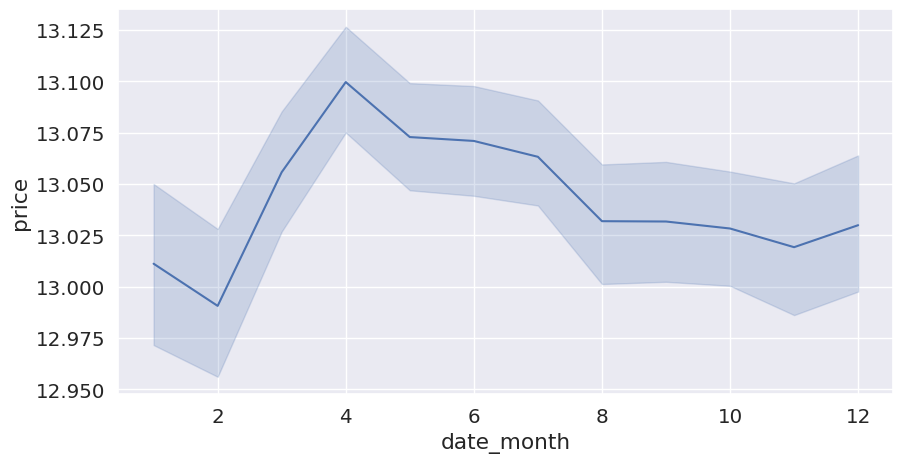

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_train['date_month'], y=df_train['price'])

# Outlier handling

In [27]:
# EDA 과정에서 살펴본 grade = 3인 이상치 제거
df_train.loc[df_train.grade==3]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month
2302,2302,2015-02-25,12.476100,1,0.75,520,12981,1.0,0,0,...,0,1920,0,98022,47.2082,-121.995,1340,12233,2015,2
4123,4123,2014-11-04,12.542545,1,0.00,600,24501,1.0,0,0,...,0,1950,0,98045,47.5316,-121.749,990,22549,2014,11


In [28]:
print(df_train[df_train['grade']==3].sqft_lot.mean())
print(df_train[df_train['grade']==4].sqft_lot.mean())

18741.0
25071.869565217392


In [29]:
df_train.drop([2302,4123], axis=0, inplace=True)

In [30]:
# sqft_living 이상치 제거
df_train[df_train.sqft_living > 13000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month
8912,8912,2014-05-05,14.639686,7,8.0,13540,307752,3.0,0,4,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,5


In [31]:
df_train.drop(8912, axis = 0, inplace = True)

In [32]:
# sqft_lot 이상치 제거
df_train.loc[(df_train.sqft_lot>1500000)&(df_train.price>13)]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month
1231,1231,2015-03-27,13.458836,4,1.0,1300,1651359,1.0,0,3,...,0,1920,0,98022,47.2313,-122.023,2560,425581,2015,3


In [33]:
df_train.drop(1231, axis = 0, inplace = True)

##  

# Feature Engineering

In [34]:
df_train["sqft_above"] = df_train["sqft_above"].map(lambda i:np.log(i) if i>0 else 0)
df_train["sqft_basement"] = df_train["sqft_basement"].map(lambda i:np.log(i) if i>0 else 0)
df_train["sqft_living"] = df_train["sqft_living"].map(lambda i:np.log(i) if i>0 else 0)
df_train["sqft_living15"] = df_train["sqft_living15"].map(lambda i:np.log(i) if i>0 else 0)
df_train["sqft_lot"] = df_train["sqft_lot"].map(lambda i:np.log(i) if i>0 else 0)
df_train["sqft_lot15"] = df_train["sqft_lot15"].map(lambda i:np.log(i) if i>0 else 0)

df_test["sqft_above"] = df_test["sqft_above"].map(lambda i:np.log(i) if i>0 else 0)
df_test["sqft_basement"] = df_test["sqft_basement"].map(lambda i:np.log(i) if i>0 else 0)
df_test["sqft_living"] = df_test["sqft_living"].map(lambda i:np.log(i) if i>0 else 0)
df_test["sqft_living15"] = df_test["sqft_living15"].map(lambda i:np.log(i) if i>0 else 0)
df_test["sqft_lot"] = df_test["sqft_lot"].map(lambda i:np.log(i) if i>0 else 0)
df_test["sqft_lot15"] = df_test["sqft_lot15"].map(lambda i:np.log(i) if i>0 else 0)

In [35]:
# log를 취해서 분포 조정
logdata = df_train[["price", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]]

for i in range(7):
    print("{:<10}\t Skewness: {:.3f}\t Kurtosis: {:.3f}".format(logdata.columns[i], df_train[logdata.columns[i]].skew(), df_train[logdata.columns[i]].kurt()))

# Based on the Output :
# 수치적으로 정규분포에 가까워진 것을 확인할 수 있다.

price     	 Skewness: 0.432	 Kurtosis: 0.731
sqft_above	 Skewness: 0.235	 Kurtosis: -0.346
sqft_basement	 Skewness: 0.488	 Kurtosis: -1.708
sqft_living	 Skewness: -0.042	 Kurtosis: -0.087
sqft_living15	 Skewness: 0.210	 Kurtosis: -0.200
sqft_lot  	 Skewness: 0.979	 Kurtosis: 3.302
sqft_lot15	 Skewness: 0.983	 Kurtosis: 3.564


In [36]:
df_train["total_sqft"] = df_train["sqft_above"] + df_train["sqft_basement"]
df_test["total_sqft"] = df_test["sqft_above"] + df_test["sqft_basement"]

In [37]:
df_train[["total_sqft", "sqft_living"]].head()
# Based on the Output :
# 건물의 총 면적을 만들어서 거주공간 면적과 비교해보면 값이 같다.
# 이는 sqft_living 변수가 건물의 연면적을 의미함을 알 수 있다.

,total_sqft,sqft_living
0,7.073270,7.073270
1,6.646391,6.646391
2,7.426549,7.426549
3,7.447168,7.447168
4,6.966024,6.966024


In [38]:
# 따라서 한개 Drop
df_train.drop(["total_sqft"], inplace = True, axis = 1)
df_test.drop(["total_sqft"], inplace = True, axis = 1)

In [39]:
# 용적률 (volume ratio)= 건물연면적 / 토지면적 * 100
df_train["Vol_ratio"] = (df_train["sqft_living"] / df_train["sqft_lot"]) * 100
df_test["Vol_ratio"] = (df_test["sqft_living"] / df_test["sqft_lot"]) * 100




In [40]:
# 지하실을 제외한 평방 피트 / 주거 공간의 평방 피트
for data in [df_train, df_test]:

    data['above_per_living'] = data['sqft_above']/data['sqft_living']

In [41]:
# zipcode별로 price의 평균을 내어 rank를 매겨준다 (집값이 낮으면 1 올라갈수록 +)
zipcode_data = df_train.groupby('zipcode').aggregate(np.mean)

zipcode_ranks = {}
rank = 1
for idx, row in zipcode_data.sort_values(by='price').iterrows():
    zipcode_ranks[idx] = rank
    rank += 1



In [42]:
for data in [df_train, df_test]:
    zipcode_feature = []
    for idx, row in data.iterrows():
        zipcode_feature.append(zipcode_ranks[row.zipcode])
    data['zipcode_ranks'] = zipcode_feature

In [43]:
zipcode_data = df_train.groupby('zipcode').aggregate(np.var)

zipcode_ranks_var = {}
rank = 1
for idx, row in zipcode_data.sort_values(by='price', ascending=False).iterrows():
    zipcode_ranks_var[idx] = rank
    rank +=1

In [44]:
for data in [df_train, df_test]:
    zipcode_feature = []
    for idx, row in data.iterrows():
        zipcode_feature.append(zipcode_ranks_var[row.zipcode])
    data['zipcode_ranks_var'] = zipcode_feature

In [45]:
# Month별로 price의 평균을 내어 rank를 매겨준다 (집값이 낮으면 1 올라갈수록 +)
month = df_train.groupby('date_month').aggregate(np.mean)

month_ranks = {}
rank = 1
for idx, row in month.sort_values(by='price').iterrows():
    month_ranks[idx] = rank
    rank += 1

In [46]:
for data in [df_train, df_test]:
    month_feature = []
    for idx, row in data.iterrows():
        month_feature.append(month_ranks[row.date_month])
    data['month_rank'] = month_feature

In [47]:
# 위도(latitude)와 경도(longitude) 값을 기반으로 지구상의 두 지점 간의 최단 거리를 계산위한 haversine 모듈 사용
!pip install haversine

In [48]:
from haversine import haversine
bridge_wh = (47.641076, -122.259196)
for data in [df_train, df_test]:
    house_wh = data.loc[:, ['lat','long']]
    house_wh = list(house_wh.itertuples(index=False, name=None))

    dist = []
    for house in house_wh:
        dist.append(np.log(1/haversine(house, bridge_wh)))
    data['dist_bridge'] = dist

In [49]:
# 위경도를 기준으로 사용하여 pca를 진행하여 새로운 변수를 만들어준다.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [50]:
for data in [df_train, df_test]:
    coord = data[['lat','long']]
    pca_coord = PCA(n_components=2).fit(coord).transform(coord)
    data['pca1'] = pca_coord[:, 0]
    data['pca2'] = pca_coord[:, 1]



In [51]:
for data in [df_train, df_test]:

    data['term'] = -(data.date_year - data.yr_built)

In [52]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month',
       'Vol_ratio', 'above_per_living', 'zipcode_ranks', 'zipcode_ranks_var',
       'month_rank', 'dist_bridge', 'pca1', 'pca2', 'term'],
      dtype='object')

In [53]:
df_train.shape

(15031, 32)

In [54]:
df_train.drop(["date", "date_month"], inplace = True, axis = 1)
df_test.drop(["date", "date_month"], inplace = True, axis = 1)

In [55]:
df_train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_year,Vol_ratio,above_per_living,zipcode_ranks,zipcode_ranks_var,month_rank,dist_bridge,pca1,pca2,term
0,0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,...,2014,81.872131,1.0,10,24,4,-2.670176,-0.000978,-0.065771,-59
1,1,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,...,2015,72.162268,1.0,32,47,1,-2.392741,-0.129163,0.122743,-82
2,2,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,...,2015,82.543377,1.0,57,39,1,-2.789736,0.092567,0.151817,-28
3,3,12.458775,3,2.25,7.447168,8.827468,2.0,0,0,3,...,2014,84.363583,1.0,8,58,10,-3.616258,0.075816,-0.264781,-19
4,4,12.583995,3,1.50,6.966024,9.181015,1.0,0,0,3,...,2015,75.874231,1.0,9,22,2,-3.261506,0.020480,-0.180864,-52


# Modeling & Submission

In [56]:

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [57]:
y_train = df_train.price
x_train = df_train.drop(['id', 'price'], axis=1)
x_test = df_test.drop(['id'], axis=1)


## XGB

In [58]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

### XGB1 num_boost_round=5000

In [59]:
y_train = df_train.price

#xgb 사용을 위해 DMatrix 형태로 Dataset 변환
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=50, verbose_eval=500, show_stdv=False)

rounds=len(cv_output)

xgb1 = xgb.train(xgb_params, dtrain, num_boost_round=rounds)
preds = xgb1.predict(dtest)

xgb1_sub = df_test[['id']]
xgb1_sub['price'] = preds

[01:29:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:29:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[01:29:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:29:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[01:29:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:29:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:12.43370	test-rmse:12.43370
[500]	train-rmse:0.17313	test-rmse:0.18966
[1000]	train-rmse:0.12495	test-rmse:0.15994
[1500]	train-rmse:0.10968	test-rmse:0.15718
[2000]	train-rmse:0.09858	test-rmse:0.15615
[2500]	train-rmse:0.08930	test-rmse:0.15568
[3000]	train-rmse:0.08137	test-rmse:0.15549
[3085]	train-rmse:0.08010	test-rmse:0.15549
[01:33:23] WARNING: ../src/objective/regr

### XGB2 num_boost_round=20000

In [60]:
y_train = np.expm1(df_train.price)

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=20000, early_stopping_rounds=50, verbose_eval=500, show_stdv=False)
rounds=len(cv_output)

xgb2 = xgb.train(xgb_params, dtrain, num_boost_round=rounds)
preds = xgb2.predict(dtest)

xgb2_sub = df_test[['id']]
xgb2_sub['price'] = preds

[01:35:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[01:35:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[01:35:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:649759.68300	test-rmse:649880.03476
[500]	train-rmse:78546.59740	test-rmse:119825.56783
[1000]	train-rmse:64045.14419	test-rmse:115112.46919
[1500]	train-rmse:54963.26578	test-rmse:113640.84882
[2000]	train-rmse:48492.30645	test-rmse:112925.49931
[2500]	train-rmse:43358.10659	test-rmse:112545.94739
[3000]	train-rmse:39158.62216	test-rmse:112323.16505
[3500]	train-rmse:35662

### xgb1_pred와 xgb2_pred를 조합하여 최적의 가중치 조합을 탐색



In [61]:
xgb1_pred = xgb1.predict(dtrain)
xgb2_pred = xgb2.predict(dtrain)
mse = {}
ii = np.arange(0, 1, 0.01)
for i, ii in enumerate(ii):
    xgb_train_pred = ii*np.expm1(xgb1_pred) + (1-ii)*xgb2_pred
    mse[i] = np.sqrt(mean_squared_error(y_train, xgb_train_pred))

xgb_min = min(mse.values())

for i in range(100):
    if mse[i] == xgb_min:
        print(i)

0


In [62]:
xgb_train_pred = 0*np.expm1(xgb1_pred) + 1*xgb2_pred

In [65]:
# xgb 모델에 대한 Submission CSV 파일 생성
xgb_sub = pd.merge(xgb1_sub, xgb2_sub, how='left', on='id')
xgb_sub.columns = ['id','price1','price2']
xgb_sub['price'] = (0*np.expm1(xgb_sub['price1']) + 1*xgb_sub['price2'])
xgb_sub = xgb_sub[['id','price']]
# RMSE
xgb_sub.to_csv('xgb_sub.csv', index=False)

## LGBM

In [66]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30,
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950
}

### LGB1

In [67]:
y_train = df_train.price

folds = KFold(n_splits=5, shuffle=True, random_state=1)
predictions = np.zeros(len(x_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(x_train.iloc[trn_idx], label=y_train.iloc[trn_idx])
    val_data = lgb.Dataset(x_train.iloc[val_idx], label=y_train.iloc[val_idx])

    num_round = 10000
    lgb1 = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    predictions += lgb1.predict(x_test, num_iteration=lgb1.best_iteration) / folds.n_splits

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.136974	valid_1's rmse: 0.162558
[1000]	training's rmse: 0.119239	valid_1's rmse: 0.159374
[1500]	training's rmse: 0.107206	valid_1's rmse: 0.158328
Early stopping, best iteration is:
[1660]	training's rmse: 0.103946	valid_1's rmse: 0.15819
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.136962	valid_1's rmse: 0.16237
[1000]	training's rmse: 0.118986	valid_1's rmse: 0.158942
[1500]	training's rmse: 0.10706	valid_1's rmse: 0.15839
Early stopping, best iteration is:
[1558]	training's rmse: 0.105827	valid_1's rmse: 0.158297
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: mi

In [68]:
lgb1_sub = pd.DataFrame()
lgb1_sub['id'] = df_test.id
lgb1_sub['price'] = predictions

### LGB2

In [69]:
y_train = np.expm1(df_train.price)

folds = KFold(n_splits=5, shuffle=True, random_state=1)
predictions = np.zeros(len(x_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(x_train.iloc[trn_idx], label=y_train.iloc[trn_idx])
    val_data = lgb.Dataset(x_train.iloc[val_idx], label=y_train.iloc[val_idx])

    num_round = 10000
    lgb2 = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    predictions += lgb2.predict(x_test, num_iteration=lgb2.best_iteration) / folds.n_splits

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 93977.8	valid_1's rmse: 137041
[1000]	training's rmse: 78425.7	valid_1's rmse: 134110
Early stopping, best iteration is:
[1352]	training's rmse: 71489.7	valid_1's rmse: 133591
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 95197.3	valid_1's rmse: 125212
Early stopping, best iteration is:
[899]	training's rmse: 81438.6	valid_1's rmse: 123195
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 97980.7	valid_1's rmse: 117517
[1000]	training's rmse: 80858.9	valid_1's rmse: 1147

In [70]:
lgb2_sub = pd.DataFrame()
lgb2_sub['id'] = df_test.id
lgb2_sub['price'] = predictions

### lgb1_pred와 lgb2_pred를 조합하여 최적의 가중치 조합을 탐색

In [71]:
lgb1_pred = lgb1.predict(x_train)
lgb2_pred = lgb2.predict(x_train)
mse = {}
ii = np.arange(0, 1, 0.01)
for i, ii in enumerate(ii):
    train_pred = ii*np.expm1(lgb1_pred) + (1-ii)*lgb2_pred
    mse[i] = np.sqrt(mean_squared_error(y_train, train_pred))

lgb_min = min(mse.values())

for i in range(100):
    if mse[i] == lgb_min:
        print(i)

74


In [72]:
lgb_train_pred = 0.59*np.expm1(lgb1_pred)+0.41*lgb2_pred

In [75]:
lgb_sub = pd.merge(lgb1_sub, lgb2_sub, how='left', on='id')
lgb_sub.columns = ['id','price1','price2']
lgb_sub['price'] = (0.59*np.expm1(lgb_sub['price1']) + 0.41*lgb_sub['price2'])
lgb_sub = lgb_sub[['id','price']]
lgb_sub.to_csv('lgb_sub.csv', index=False)

## RF

In [76]:
forest_regr = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=None,
           max_features=28, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


rf = forest_regr.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [87]:
rf_sub = pd.DataFrame()
rf_sub['id'] = df_test.id
rf_sub['price'] = predictions
rf_sub.to_csv('rf_sub.csv', index=False)

## GDB

In [78]:
gdb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)

gdb.fit(x_train, y_train)
predictions = gdb.predict(x_test)

In [88]:
gdb_sub = pd.DataFrame()
gdb_sub['id'] = df_test.id
gdb_sub['price'] = predictions
gdb_sub.to_csv('gdb_sub.csv', index=False)

## ENSEMBLE

In [85]:

ensemble_sub = pd.DataFrame()

ensemble_sub['id'] = df_test.id
#XGB 성능이 제일 좋음
ensemble_sub['price'] = xgb_sub['price']*0.8 + lgb_sub['price']*0.05 + gdb_sub['price']*0.1 + rf_sub['price']*0.05
ensemble_sub.to_csv('ensemble_sub.csv', index=False)

# Submission Score

Private score: 105521.03201

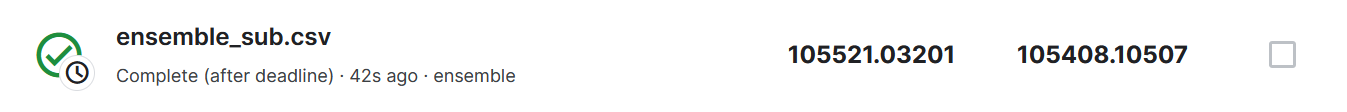